In [3]:
import geopandas
import scipy as sp
import pandas as pd
import numpy as np
import numpy 
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor

In [4]:
os.chdir('/Users/Edward/Documents/LandPermitAnalysis/data/')

In [5]:
data = pd.read_csv('Land_Use_Permits.csv')
data.head(5)

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,RelatedRecord,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location 1
0,3027306-LU,Commercial,Non-Residential,Master Use Permit,NaN,[EDG Pre-sub] landlord work to modify and upgr...,NaN,NaN,NaN,NaN,...,NaN,1512 5TH AVE,SEATTLE,WA,98101.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.611197,-122.335822,"1512 5TH AVE\nSEATTLE, WA 98101\n(47.61119722,..."
1,3003127-LU,Multifamily,Residential,Master Use Permit,NaN,CANCELLED - DECISION EXPIRED 12/28/09 JH. Lan...,NaN,2.0,8.0,NaN,...,NaN,619 13TH AVE E,SEATTLE,WA,98102.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.624775,-122.315974,"619 13TH AVE E\nSEATTLE, WA 98102\n(47.6247753..."
2,3016564-LU,Multifamily,Residential,Master Use Permit,NaN,Land Use Application to subdivide one developm...,NaN,NaN,NaN,NaN,...,NaN,3626 36TH AVE S,SEATTLE,WA,98144.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.570692,-122.287919,"3626 36TH AVE S\nSEATTLE, WA 98144\n(47.570692..."
3,3028041-LU,Multifamily,Residential,Master Use Permit,NaN,Land Use Application to subdivide one developm...,NaN,NaN,NaN,NaN,...,NaN,804 25TH AVE S,SEATTLE,WA,98144.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.595260,-122.299926,"804 25TH AVE S\nSEATTLE, WA 98144\n(47.5952602..."
4,3004979-LU,Single Family/Duplex,Residential,Master Use Permit,NaN,Shoreline substantial development to allow a t...,NaN,0.0,0.0,NaN,...,NaN,2727 FAIRVIEW AVE E,SEATTLE,WA,98102.0,NaN,https://cosaccela.seattle.gov/portal/customize...,47.644955,-122.328186,"2727 FAIRVIEW AVE E\nSEATTLE, WA 98102\n(47.64..."


In [7]:
subset = data[['PermitNum', 'Latitude', 'Longitude', 'OriginalZip', 'EstProjectCost', 'PermitClass', 'StatusCurrent']].copy()

In [94]:
PermitID = []
for row in subset['PermitNum']:
    temp = row[0:7]
    PermitID.append(temp)
    
subset['PermitNum'] = PermitID

In [7]:
PermitClassID = []
for item in subset.PermitClass:
    if item == 'Commercial':
        PermitClassID.append(1)
    elif item == 'Multifamily':
        PermitClassID.append(2)
    elif item == 'Single Family/Duplex':
        PermitClassID.append(3)
    elif item == 'Institutional':
        PermitClassID.append(4)
    elif item == 'Vacant Land':
        PermitClassID.append(5)
    elif item == 'Industrial':
        PermitClassID.append(6)
    else:
        PermitClassID.append('')
        
subset['PermitClass'] = PermitClassID

In [8]:
Status = []
for item in subset.StatusCurrent:
    if item == 'Canceled':
        Status.append(1)
    elif item == 'Additional Info Requested':
        Status.append(2)
    else: 
        Status.append(3)

subset['StatusCurrent'] = Status

In [6]:
target_name = 'PermitClass'
robust_scaler = RobustScaler()
X = subset.drop('PermitClass', axis = 1)
feature_names = X.columns
X = robust_scaler.fit_transform(X)
y = subset[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

NameError: name 'subset' is not defined

In [10]:
models = pd.DataFrame(index = ['train_mse', 'test_mse'], columns = ['KNN', 'Bagging', 'RandomForest', 'Boosting'])

In [11]:
knn = KNeighborsRegressor(n_neighbors = 20, weights = 'distance', metric = 'euclidean', n_jobs = -1)

In [12]:
np.asarray(y_train)
np.asarray(X_train)
np.asarray(X_test)
np.asarray(y_test)

isNan_X_test = pd.isnull(X_test)
isNan_y_test = pd.isnull(y_test)
isNan_X_train = pd.isnull(X_train)
isNan_y_train = pd.isnull(y_train)

X_train[isNan_X_train]=0
y_train[isNan_y_train]=0
X_test[isNan_X_test]=0
y_test[isNan_y_test]=0


In [13]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
          weights='distance')

In [14]:
models.loc['train_mse','KNN'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

TypeError: can't multiply sequence by non-int of type 'float'

In [34]:
models.loc['test_mse','KNN'] = mean_squared_error(y_pred=knn.predict(X_test), y_true=y_test)

TypeError: can't multiply sequence by non-int of type 'float'

In [7]:
data_x = data.PermitClass.replace(np.nan, 'unknow', regex=True)

In [8]:
Commercial = 0
Multifamily = 0
SingleFamily = 0
Unknown = 0
Institutional = 0 
VacantLand = 0
Industrial = 0

for item in data_x:
    if item == 'Commercial':
        Commercial += 1
    elif item == 'Multifamily':
        Multifamily += 1
    elif item == 'Single Family/Duplex':
        SingleFamily += 1
    elif item == 'unknow':
        Unknown += 1
    elif item == 'Institutional':
        Institutional += 1
    elif item == 'Vacant Land':
        VacantLand += 1
    else:
        Industrial += 1

x = ['Commercial', 'Multifamily', 'Single Family', 'Unknown', 'Institutional', 'Vacant Land', 'Industrial']
y = [Commercial, Multifamily, SingleFamily, Unknown, Institutional, VacantLand, Industrial]

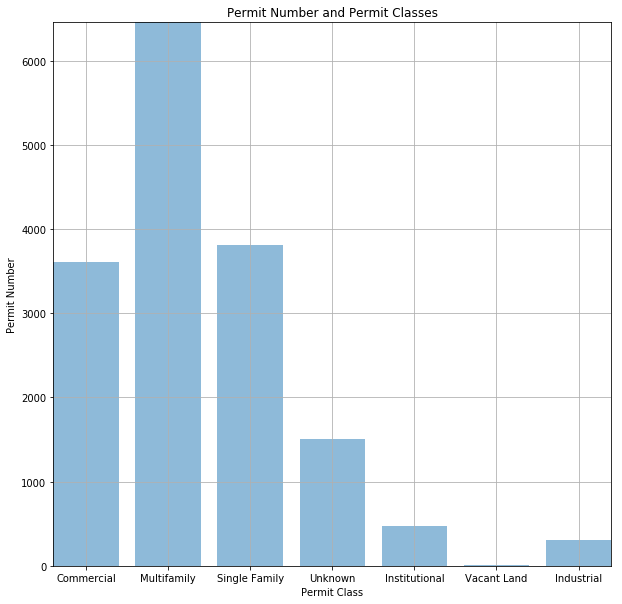

In [10]:
plt.bar(x,y, align='center', alpha=0.5)
plt.rcParams["figure.figsize"] =[10,10]
plt.title("Permit Number and Permit Classes")
plt.xlabel("Permit Class")
plt.ylabel("Permit Number")
plt.autoscale(tight=True)
plt.grid()
plt.show()

In [64]:
district=geopandas.read_file('Council_Districts/Council_Districts.shp')

In [20]:
district.crs

{'init': 'epsg:4326'}

In [23]:
district = district.to_crs({'init': 'epsg:3395'})

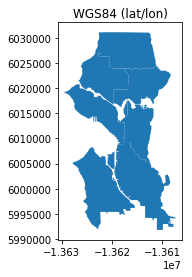

In [27]:
ax = district.plot()
ax.set_title("WGS84 (lat/lon)");

In [ ]:
knn = KNeighborsRegressor*(n_neighbors = 20, weight = 'distance', metric = 'euclidean', n_jobs = -1)